In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.datasets import make_circles

(400, 2) (400,)


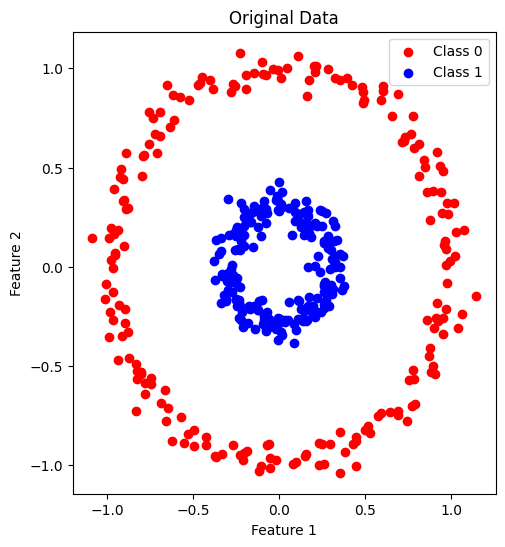

In [3]:
# 生成非線性可分的數據集
X, y = make_circles(n_samples=400, factor=0.3, noise=0.05, random_state=42)
print(X.shape, y.shape)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Do not use packages to implement KernelPCA

In [4]:
# 將數據標準化
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# Define the kernel matrix , RBF kenel function
sigma = 1.0
K = np.zeros((X_scaled.shape[0], X_scaled.shape[0]))
for i in range(X_scaled.shape[0]):
    for j in range(X_scaled.shape[0]):
        K[i, j] = np.exp(-np.linalg.norm(X_scaled[i] - X_scaled[j]) ** 2 / (2 * sigma ** 2))

In [5]:
N = K.shape[0]
one_n = np.ones((N, N)) / N
K_centered = K
# K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n

In [6]:
check_symmetric = np.allclose(K, K.T)
print(check_symmetric)
check_symmetric_c = np.allclose(K_centered, K_centered.T)
print(check_symmetric_c)

True
True


# Calculate eigen , sort it and pick the first 3 ones.

In [7]:
eigvals, eigvecs = np.linalg.eigh(K_centered)

idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

alphas = eigvecs[:, :3]
lambdas = eigvals[:3]

X_kpca = alphas * np.sqrt(lambdas)

In [11]:
print(X_kpca.shape)
print(X_kpca)

(400, 3)
[[ 0.85958575  0.39085918 -0.01722824]
 [ 0.83414883 -0.15813335  0.39565883]
 [ 0.2578561   0.4646139   0.30174473]
 ...
 [ 0.83984362  0.08211812  0.40930175]
 [ 0.82597623 -0.08569398 -0.42677823]
 [ 0.24847706 -0.52341204  0.18088754]]


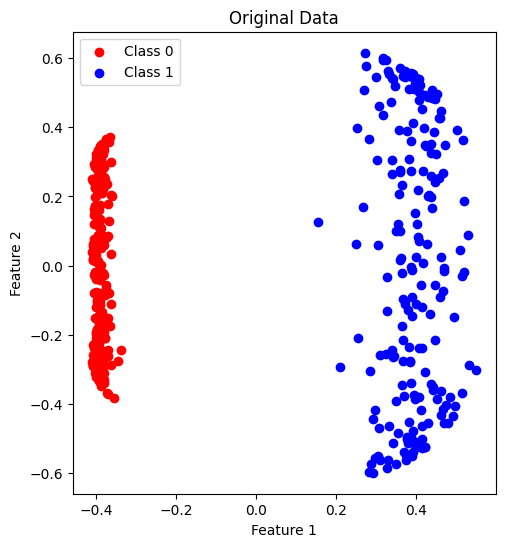

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color='red', label='Class 0')
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color='blue', label='Class 1')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

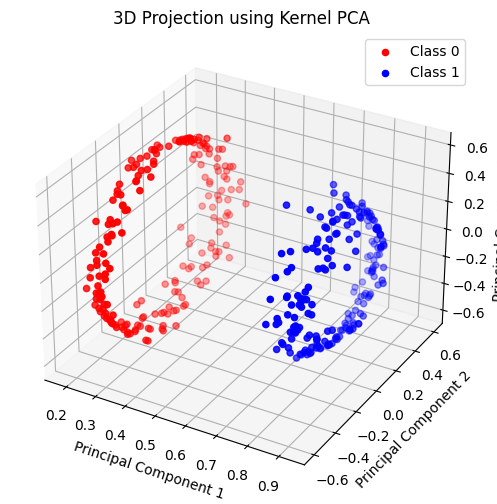

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], X_kpca[y == 0, 2], color='red', label='Class 0')
ax.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], X_kpca[y == 1, 2], color='blue', label='Class 1')

ax.set_title('3D Projection using Kernel PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

# Use package to implement KernelPCA

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

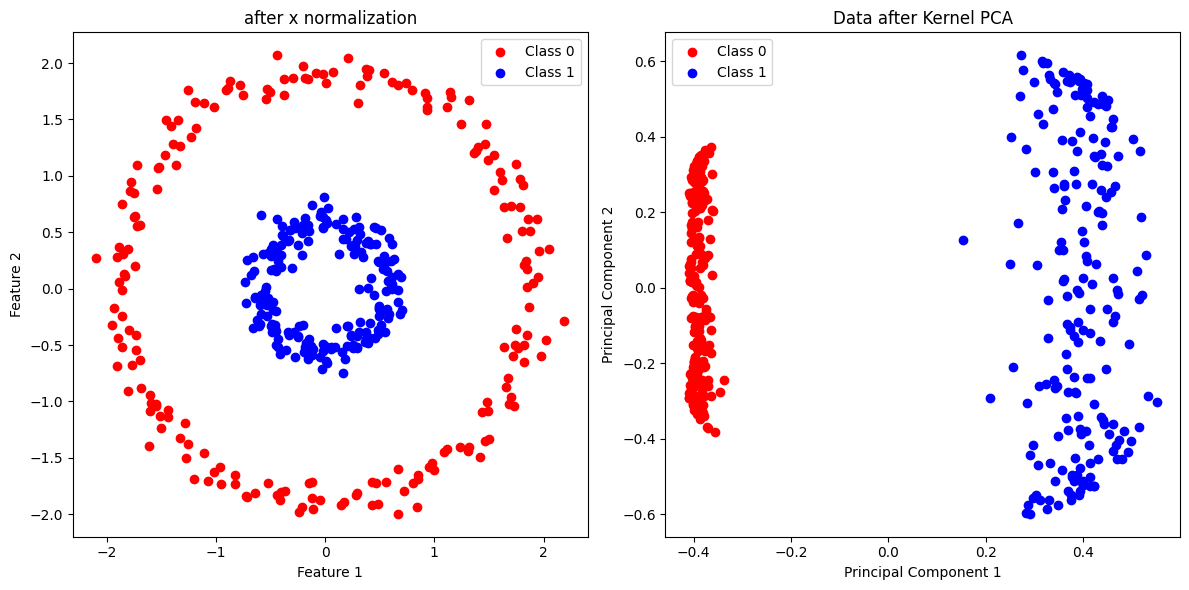

In [14]:
# 將數據標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_mean = np.mean(X, axis=0)
# X_std = np.std(X, axis=0)
# X_scaled = (X - X_mean) / X_std

# 使用 RBF 核進行 Kernel PCA
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=1)
X_kpca = kpca.fit_transform(X_scaled)

# 繪製原始數據
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color='red', label='Class 0')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='blue', label='Class 1')
plt.title('after x normalization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# 繪製投影後的數據
plt.subplot(1, 2, 2)
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color='red', label='Class 0')
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color='blue', label='Class 1')
plt.title('Data after Kernel PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

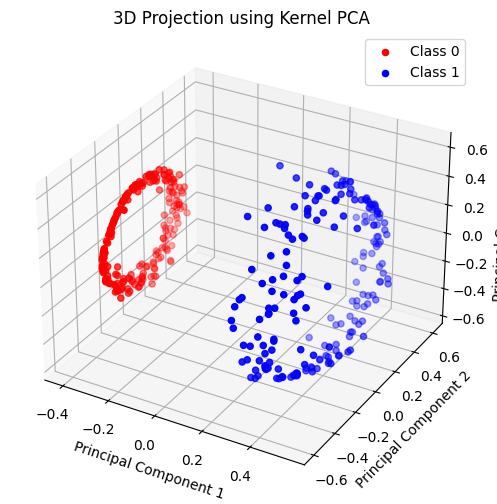

In [15]:
# 繪製 3 維圖像
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 根據標籤繪製數據點
ax.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], X_kpca[y == 0, 2], color='red', label='Class 0')
ax.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], X_kpca[y == 1, 2], color='blue', label='Class 1')

# 設置圖例和標籤
ax.set_title('3D Projection using Kernel PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()